<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor


In [24]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    
    
    plt.show()

#Load cifar10 dataset

In [11]:

(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
show_imgs(x_train)

NameError: ignored

# Normalization


In [12]:
batch_size=128
print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255
print(x_train.min() , x_train.max())



0 255
0.0 1.0


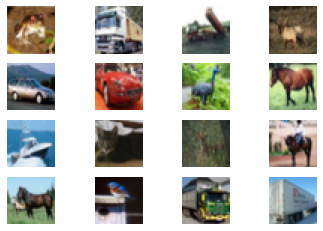

In [13]:
show_imgs(x_train)

In [1]:
x_train_split, x_vald_split,y_train_split,y_vald_split= train_test_split(x_train,y_train, train_size=0.7, test_size=0.3)

print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


NameError: ignored

In [8]:
ks= KFold(n_splits=10)
ks.split(x_train)

for train_index, test_index in ks.split(x_train):
  print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 5000  5001  5002 ... 49997 49998 49999] TEST: [   0    1    2 ... 4997 4998 4999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [5000 5001 5002 ... 9997 9998 9999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [10000 10001 10002 ... 14997 14998 14999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [15000 15001 15002 ... 19997 19998 19999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [20000 20001 20002 ... 24997 24998 24999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [25000 25001 25002 ... 29997 29998 29999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [30000 30001 30002 ... 34997 34998 34999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [35000 35001 35002 ... 39997 39998 39999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [40000 40001 40002 ... 44997 44998 44999]
TRAIN: [    0     1     2 ... 44997 44998 44999] TEST: [45000 45001 45002 ... 49997 49998 49999]


##Hold-out defination

In [16]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  # print(len(ds))
 
  if isinstance(train_ds_size, float) and isinstance(vald_ds_size, float) and (train_ds_size+vald_ds_size>1.0) :
    raise ValueError("Split size is greater the dataset size")
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  # print(train_count)
  # print(valid_count)
  # print(ds[:train_count].shape)
  # print(ds[train_count:(train_count+valid_count)].shape)
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

In [27]:
def k_fold(ds,labels_train,fold_count):
    ds_fold=ceil(len(ds)/fold_count)
    # print(ds_fold)
    fold_list=list();
    for i in range(fold_count):
     fold_entires=list();
     fold_list.append(fold_entires)
     rand_indices=random.sample(range(0, len(ds)), ds_fold)
    #  print(rand_indices)
     for j in range(len(rand_indices)):
       fold_entires.append(ds[j])
     for j in range(len(rand_indices)): 
       ds.pop(j)
     return np.array(fold_list),ds;
image_list,pop=k_fold(list(x_train),list(),10)
image_list[0].shape
len(pop)

45000

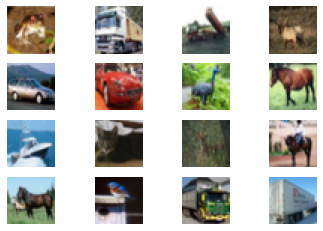

In [25]:
show_imgs(image_list[0])

In [19]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)
x_train_split
print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


Method to display images that are generatored by generator during the traning at certain epochs

Complie the only Discriminator and the GAN. We don't need a compliation config 
for generator because it is covered as part of GAN